<a href="https://colab.research.google.com/github/LucasAb8/ProcesamientoDelHabla/blob/main/TP1/Webscrapping_Preprocesamiento_LucasAbruzzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 PROCESAMIENTO DEL HABLA

**Escriba aquí su nombre completo.**


* Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

* Explicar y justificar cada paso realizado.

* Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.


### Entrega de los ejercicios

1. Crea un repositorio GitHub público dedicado a esta materia.
2. Sube tus notebooks de resolución para cada desafío allí.
3. Por cada desafío utilizaremos un sólo notebook.
4. Debes entregar tu TP1 en el foro correspondiente, siguiendo las instrucciones que allí indica.




## EJERCICIO CONSIGNA

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.



Link a la Página Web:

### Importaciones a instalaciones necesarias

In [ ]:
#Instalaciones e importaciones de librerías
!pip install requests beautifulsoup4 html5lib
from bs4 import BeautifulSoup


!pip install wordcloud
from wordcloud import WordCloud

!pip install spacy
!python -m spacy download es_core_news_sm
import spacy


import nltk
nltk.download('stopwords')   #Descarga el conjunto de stopwords del repositorio de NLTK
from nltk.corpus import stopwords

import string
import requests
import re
import matplotlib.pyplot as plt
import numpy as np



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 61.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1- Webscrapping

Extrae un texto de Internet de una sóla página web usando alguna de las técnicas de webscrapping vistas en clase. Busca el discurso de alguna persona quien te inspire o haya dado una charla motivadora.

No puedes repetir ni usar ni el mismo texto ni la misma web que otra persona quien ya entregó en el foro.

Abajo añade los bloques de código y texto necesarios. Explica paso a paso como descargaste el texto de tu interés.


In [ ]:
#Almacenamos el link de la pagina en una variable
link_url = "https://www.fundacionaquae.org/wiki/ada-lovelace-madre-de-la-programacion/"

#Petición a la pagina con el link almacenado previamente
answer = requests.get(link_url)
#Lanzamiento de exepciones si ocurre algun error
answer.raise_for_status()

#Analiza el codigo html de la pagina
ada_sopa = BeautifulSoup(answer.text, "html5lib")

#Almacenamos el texto de la pagina web que se enuenctra en el div de clase especificada.
#La obtención a partir de una clase fue investigada en "https://www.scraperapi.com/blog/python-beautifulsoup-find-and-findall-methods/"
web_text = ada_sopa.find('div',class_ = "col-md-12 content-wrapper" ).get_text()

print(web_text)


										
                															Ada Lovelace nació el 10 de diciembre de 1815 en el seno del matrimonio del poeta Lord Byron y Anna Isabella Milbanke. Esta última abandonó a su marido, padre de Ada, al poco tiempo de casarse. Este hecho que provocó que Lovelace recibiese una educación muy peculiar para una mujer de su época. Y es que se basada en una formación excepcionalmente estricta en matemáticas. Algo que le llevó, años más tarde, a convertirse en una pionera de este ámbito llegando a ser considerada como la «madre» de la programación.
<span data-mce-type="bookmark" style="display: inline-block; width: 0px; overflow: hidden; line-height: 0;" class="mce_SELRES_start">﻿</span>
Desde su infancia, Ada Lovelace mostro un talento innato para los números. A los 17 años, conoció a Charles Babbage, un conocido matemático e inventor que se quedó impresionada por la inteligencia y conocimiento de la joven. Fue entonces cuando Ada tuvo claro que quería trabajar a su lado y, mientra

## 2- Preprocesamiento

### 2.1 Muestra las stop words que tenga tu texto.

In [ ]:
#Almacenamos el conjunto de stopwords (del español)
stopwords_spanish = set(stopwords.words('spanish'))
#Imprimimos para verificar
print(stopwords_spanish)

{'le', 'vosotras', 'seré', 'habidas', 'estuvieras', 'tu', 'estuvieseis', 'estuviesen', 'el', 'tendré', 'vosotros', 'tanto', 'tendréis', 'estuviera', 'sin', 'suyo', 'tendrá', 'esos', 'hayamos', 'tuviéramos', 'donde', 'se', 'seamos', 'teníais', 'tuviera', 'estaban', 'estábamos', 'estás', 'hayáis', 'pero', 'habidos', 'tuvisteis', 'serían', 'serías', 'me', 'habrá', 'una', 'sentido', 'estuviste', 'tienen', 'para', 'como', 'habrías', 'hubiste', 'no', 'estar', 'otra', 'e', 'estabais', 'las', 'fuesen', 'hube', 'esta', 'nosotros', 'ti', 'o', 'somos', 'ese', 'hubiera', 'nuestros', 'fueseis', 'tenemos', 'fuese', 'nosotras', 'estabas', 'muy', 'fueses', 'los', 'su', 'ellos', 'contra', 'hayas', 'quien', 'estéis', 'nos', 'tuvo', 'tuvieras', 'tendremos', 'ni', 'desde', 'estemos', 'hubieseis', 'serás', 'tuvieseis', 'vuestra', 'fueron', 'fuiste', 'tuvieses', 'suyos', 'sean', 'estuviésemos', 'mis', 'habíais', 'nada', 'esas', 'estuvieron', 'fueran', 'fue', 'estaría', 'estarías', 'habríamos', 'sí', 'habien

### 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

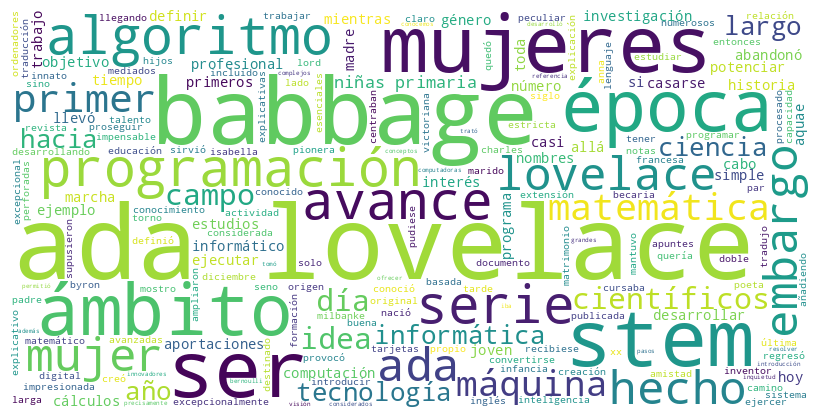

In [ ]:
def clean_text(text):
  new_text = ''.join(c for c in text.lower() if c not in string.punctuation)    #Pasaje a minúscula y eliminación de signos de puntuación
  new_text = re.sub(r'[^\w\s,]', '', new_text)                                  #Eliminación de caracteres extraños
  new_text = re.sub(r'\s+', ' ', new_text).strip()                              #Eliminación de espacios en blanco (ademas de aquellos al principio y al final)
  new_text = new_text.split()                                                   #Separación en lista para poder identificar stopwords
  new_text = [p for p in new_text if p not in stopwords_spanish]                #Filtrado (ignorando los stopwords)
  new_text = ' '.join(new_text)                                                 #Unión de los elementos de la lista en un string
  return new_text


#Eliminación de etiquetas html. Investigación en https://www.quora.com/How-do-I-remove-HTML-tags-from-a-string-in-Python
text = re.sub(r'<[^>]*>', '', web_text)
text = clean_text(text)


#Creación objeto worldCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

#Generación de imágen de nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 2.3 Usando el texto que conseguiste en el punto 1).



#### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.


In [ ]:
text2 =re.sub(r'<[^>]*>', '', web_text).strip()
nlp = spacy.load("es_core_news_sm")                #Carga del modelo
doc = nlp(text2)                                   #Aplicación modelo al texto
sentences = [s.text for s in doc.sents]            #Segmentacion
sentences_cleaned = []
for sentence in sentences:
  new_sentence = clean_text(sentence)              #Limpieza de cada oracion
  sentences_cleaned.append(new_sentence)
documents = np.char.split(sentences_cleaned)       #Listado de oraciones separadas en palabras

tokens = []
#Creacion de una lista con las palabras sin repetir de los documentos
for doc in documents:
  for word in doc:
    if np.isin(word,tokens) == False:
      tokens = np.append(tokens,word)
print(tokens)


['ada' 'lovelace' 'nació' '10' 'diciembre' '1815' 'seno' 'matrimonio'
 'poeta' 'lord' 'byron' 'anna' 'isabella' 'milbanke' 'última' 'abandonó'
 'marido' 'padre' 'tiempo' 'casarse' 'hecho' 'provocó' 'recibiese'
 'educación' 'peculiar' 'mujer' 'época' 'basada' 'formación'
 'excepcionalmente' 'estricta' 'matemáticas' 'llevó' 'años' 'tarde'
 'convertirse' 'pionera' 'ámbito' 'llegando' 'ser' 'considerada' 'madre'
 'programación' 'infancia' 'mostro' 'talento' 'innato' 'números' '17'
 'conoció' 'charles' 'babbage' 'conocido' 'matemático' 'inventor' 'quedó'
 'impresionada' 'inteligencia' 'conocimiento' 'joven' 'entonces' 'claro'
 'quería' 'trabajar' 'lado' 'mientras' 'cursaba' 'estudios' 'becaria'
 'tener' 'hijos' 'embargo' 'regresó' 'proseguir' 'camino' 'investigación'
 'desarrollando' 'actividad' 'victoriana' 'casi' 'impensable' 'pudiese'
 'ejercer' 'profesional' 'par' 'creó' 'primer' 'algoritmo' 'informático'
 'mantuvo' 'solo' 'buena' 'relación' 'torno' 'computación' 'digital'
 'sino' 'larg


#### 2.3.2 Determina la longitud de tu vocabulario.

In [ ]:
tokens_size = len(tokens)              #Longitud del vocabulario
print(tokens_size)

326



#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

In [ ]:
def frecuency_matrix(documents_list, tokens):
  #Tamaño del documento
  doc_size = documents_list.size
  #Tamaño del vocabulario (se vuelve a calcular para asegurar generalidad)
  tok_size = len(tokens)
  #Creación de matriz base para luego completar con las frecuencias
  frecuencies = np.zeros((doc_size,tok_size),dtype = np.uint8)

  #Conteo y registro de las ocurrencias de cada palabra de tokens en cada documento (oracion)
  row = 0
  for doc in documents:
    for word in doc:
      if word in tokens:
        i = tokens.tolist().index(word)
        frecuencies[row,i]= frecuencies[row,i]+1                          #Va sumando 1 a medida que detecta una nueva ocurrencia de alguna palabra
    row = row + 1
  return frecuencies


#Frecuencia Inversa de Documentos
def inverse_document_frequency(documents_list, tokens):
  doc_size = documents_list.size
  frequency = frecuency_matrix(documents_list, tokens)
  div = (doc_size * 1.0) / (np.sum(frequency,axis=0) * 1.0)
  return np.log10(div)


def TF_IDF_function(documents_list, tokens):
  return frecuency_matrix(documents_list, tokens) * inverse_document_frequency(documents_list, tokens)


TF_IDF_function(documents, tokens)




array([[0.4648868 , 0.4648868 , 1.54406804, ..., 0.        , 0.        ,
        0.        ],
       [0.4648868 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.4648868 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.54406804, 1.54406804,
        1.54406804]])

# Conclusiones

El desafrío no está en  las herramientas, líneas de código, librerías, etc. sino en cómo se combinan todas las anteriores según cada caso (texto extraído). Uno de los grandes desafíos que tuve fue el de poder extraer varios textos de distintas etiquetas (p) y a su vez, eliminar las etiquetas que no aportaban contenido (span). A su vez  el preprocesamiento requiere pensar el problema desde la generalidad por lo que hacer una correcta limpieza mas alla de lo que se puede ver a simple vista imprimiendo el texto en pantalla, puede resolver algunos problemas ocultos (como strings vacios que a la hora de generar una lista pueden ocupar un indice).

Otro punto que me generó un desafió es el seguimiento del formato o estructura de los datos, ya que la conversión a listas, strings, objetos particulares de librerías, etc. es constante, y eso me generó la necesidad de leer con detenimiento las documentaciones para analizar inputs/outputs.

Como desafío pendiente me quedo encontrar alternativas con tiempos de ejecución mas cortos, para evitar tantas iteraciones. Y si bien probe algunas estrategias como evitar la repetición de términos solo con el pasaje de la lista a un set y luego a una lista nuevamente, era complejo aplicarlo a todos los términos distribuídos en distintas sublistas del texto completo.

# ENTREGA




# Anexo, código de ejemplo del uso de wordcloud

Instalar e importar la librería

In [ ]:
# instalar wordcloud
!pip install wordcloud


In [ ]:

# Importar librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)


Mostramos la imagen generada

In [ ]:

# mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Modificamos el ejemplo anterior agregando palabras en español que no queremos que considere para crear la nube de palabras. Estas son las stop_words



In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Definir stopwords en español
stopwords_es = set(STOPWORDS)
stopwords_es.update(["con", "que", "los", "para", "un", "una", "el", "la", "en", "y", "o", "de", "a", "se", "es", "al", "como", "por", "no", "su", "más", "pero", "si", "este", "esta", "eso", "esa", "todo", "todos", "todas", "cada", "cual", "cualquier", "algo", "alguna", "algún", "ningún", "ninguna", "ninguno", "otro", "otros", "otras", "sobre", "entre", "durante", "desde", "hasta", "también", "así", "mismo", "misma", "mismo", "misma", "tan", "tanto", "tanta", "muy", "poco", "poca", "poco", "nada", "solo", "sola", "solo", "sola", "siempre", "nunca", "jamás", "casi", "aproximadamente", "cerca", "lejos", "antes", "después", "ahora", "hoy", "ayer", "mañana", "luego", "mientras", "mientras tanto", "después de", "antes de", "durante", "sin", "aunque", "a pesar de", "debido a", "gracias a", "por qué", "cómo", "dónde", "cuándo", "quién", "qué", "cuál"])

# Crear un objeto WordCloud con stopwords en español
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords_es).generate(text)

# Mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
